In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, time
import matplotlib.pyplot as plt
#from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
#from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16;
from keras.applications.vgg16 import preprocess_input
import os
import pickle


Using TensorFlow backend.


In [9]:
with open('x.pickle', 'rb') as f:
    X = pickle.load(f)

with open('y.pickle', 'rb') as f:
    y = pickle.load(f)

In [13]:
len(y), len(X)

(552, 552)

In [16]:
y = np.asarray(y).astype(int)
for i in range(y.shape[0]):
    y[i] = int(y[i]) - 1
y

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9

In [17]:
y = np.asarray(y).astype(int)
for i in range(y.shape[0]):
    y[i] = int(y[i]) - 1
    
X = np.asarray(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,                                                    
                                                    random_state=42,
                                                    shuffle=True)

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = np.reshape(X_train, (-1,100, 130,1))
X_test = np.reshape(X_test, (-1,100, 130,1))

In [18]:
vein_category = 23
y_train = keras.utils.to_categorical(y_train, vein_category)
y_test = keras.utils.to_categorical(y_test, vein_category)


In [19]:
print(X_train.shape,X_test.shape, '\n', y_train.shape, y_test.shape)

(441, 100, 130, 1) (111, 100, 130, 1) 
 (441, 23) (111, 23)


In [20]:
X_train_rgb = np.zeros((X_train.shape[:-1] + (3,)))
X_test_rgb = np.zeros((X_test.shape[:-1] + (3,)))

for i in range(1,4):
    X_train_rgb[:,:,:,i-1:i] = X_train
    X_test_rgb[:,:,:,i-1:i] = X_test

In [21]:
print('X_train_rgb shape : {} \nX_test_rgb shape  : {}'.format(X_train_rgb.shape, X_test_rgb.shape))


X_train_rgb shape : (441, 100, 130, 3) 
X_test_rgb shape  : (111, 100, 130, 3)


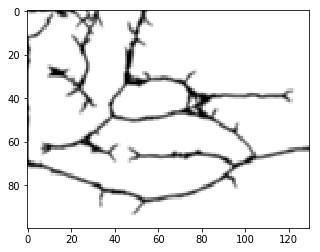

In [22]:
plt.imshow(X_train_rgb[440,:,:,0], cmap=plt.cm.binary)

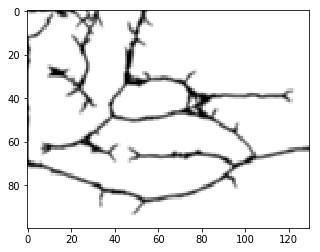

In [23]:
plt.imshow(X_train_rgb[440,:,:,2], cmap=plt.cm.binary)

In [28]:
from keras.applications import VGG16;
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3

IMG_WIDTH = 130
IMG_HEIGHT = 100
IMG_DEPTH = 3
BATCH_SIZE = 32

# Instantiate the model with the pre-trained weights (no top)
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH))

# Show the architecture
conv_base.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 130, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 130, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 130, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 65, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 65, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 65, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 32, 128)       0         
__________

In [29]:
# Extract features
train_features = conv_base.predict(X_train_rgb, batch_size=BATCH_SIZE, verbose=1)
test_features = conv_base.predict(X_test_rgb, batch_size=BATCH_SIZE, verbose=1)


111/111 [==============================] - 14s    


In [30]:
# Save extracted features
np.savez("train_features_23clsVGG16", train_features, y_train)
np.savez("test_features_23clsVGG16", test_features, y_test)

In [31]:
print(train_features.shape, "\n",  test_features.shape)

(441, 3, 4, 512) 
 (111, 3, 4, 512)


In [32]:
# Flatten extracted features
train_features_flat = np.reshape(train_features, (441, 3*4*512))
test_features_flat = np.reshape(test_features, (111, 3*4*512))


In [33]:
print(y_train.shape,  y_test.shape)
print(train_features_flat.shape,  test_features_flat.shape)

(441, 23) (111, 23)
(441, 6144) (111, 6144)


In [34]:
from keras import models
from keras import layers
from keras import optimizers
from keras import callbacks

# Define the densely connected classifier

NB_EPOCHS = 500

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=(3*4*512)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.Dense(23, activation='softmax'))
# Compile the model.
model.compile(
    loss='categorical_crossentropy',
#     optimizer=optimizers.Adam(),
  optimizer=optimizers.RMSprop(lr=2e-5),
    metrics=['acc'])
# Incorporating reduced learning and early stopping for callback
reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    epsilon=0.0001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=7,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, eary_stopping]

# Train the the model
# history = model.fit(
#     train_features_flat,
#     y_train,
#     epochs=NB_EPOCHS,
#     validation_data=(test_features_flat, y_test),
#     callbacks=callbacks
# )


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               3146240   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 23)                11799     
Total params: 3,158,039
Trainable params: 3,158,039
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Train the the model
history = model.fit(
    train_features_flat,
    y_train,
    epochs=NB_EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(test_features_flat, y_test)
)

Train on 441 samples, validate on 111 samples
Epoch 1/500
441/441 [==============================] - 2s - loss: 3.2206 - acc: 0.0612 - val_loss: 3.1552 - val_acc: 0.0450
Epoch 2/500
441/441 [==============================] - 1s - loss: 3.0274 - acc: 0.1111 - val_loss: 3.0842 - val_acc: 0.1081
Epoch 3/500
441/441 [==============================] - 1s - loss: 2.9251 - acc: 0.2200 - val_loss: 3.0429 - val_acc: 0.1892
Epoch 4/500
441/441 [==============================] - 1s - loss: 2.8426 - acc: 0.3220 - val_loss: 2.9952 - val_acc: 0.2072
Epoch 5/500
441/441 [==============================] - 1s - loss: 2.7640 - acc: 0.3923 - val_loss: 2.9389 - val_acc: 0.2973
Epoch 6/500
441/441 [==============================] - 1s - loss: 2.6899 - acc: 0.4966 - val_loss: 2.8804 - val_acc: 0.3423
Epoch 7/500
441/441 [==============================] - 1s - loss: 2.6160 - acc: 0.5692 - val_loss: 2.8320 - val_acc: 0.3514
Epoch 8/500
441/441 [==============================] - 1s - loss: 2.5439 - acc: 0.6440

441/441 [==============================] - 1s - loss: 0.2593 - acc: 0.9977 - val_loss: 0.7196 - val_acc: 0.9009
Epoch 66/500
441/441 [==============================] - 1s - loss: 0.2482 - acc: 0.9977 - val_loss: 0.7191 - val_acc: 0.9009
Epoch 67/500
441/441 [==============================] - 1s - loss: 0.2368 - acc: 0.9977 - val_loss: 0.7017 - val_acc: 0.8919
Epoch 68/500
441/441 [==============================] - 1s - loss: 0.2273 - acc: 0.9977 - val_loss: 0.6769 - val_acc: 0.9009
Epoch 69/500
441/441 [==============================] - 1s - loss: 0.2175 - acc: 0.9977 - val_loss: 0.6559 - val_acc: 0.9009
Epoch 70/500
441/441 [==============================] - 1s - loss: 0.2078 - acc: 1.0000 - val_loss: 0.6592 - val_acc: 0.9009
Epoch 71/500
441/441 [==============================] - 1s - loss: 0.1988 - acc: 0.9977 - val_loss: 0.6455 - val_acc: 0.9009
Epoch 72/500
441/441 [==============================] - 1s - loss: 0.1902 - acc: 0.9977 - val_loss: 0.6314 - val_acc: 0.9099
Epoch 73/500


441/441 [==============================] - 1s - loss: 0.0121 - acc: 1.0000 - val_loss: 0.2807 - val_acc: 0.9279
Epoch 131/500
441/441 [==============================] - 1s - loss: 0.0116 - acc: 1.0000 - val_loss: 0.2783 - val_acc: 0.9279
Epoch 132/500
441/441 [==============================] - 1s - loss: 0.0111 - acc: 1.0000 - val_loss: 0.2766 - val_acc: 0.9189
Epoch 133/500
441/441 [==============================] - 1s - loss: 0.0105 - acc: 1.0000 - val_loss: 0.2688 - val_acc: 0.9279
Epoch 134/500
441/441 [==============================] - 1s - loss: 0.0100 - acc: 1.0000 - val_loss: 0.2626 - val_acc: 0.9279
Epoch 135/500
441/441 [==============================] - 1s - loss: 0.0095 - acc: 1.0000 - val_loss: 0.2586 - val_acc: 0.9279
Epoch 136/500
441/441 [==============================] - 1s - loss: 0.0091 - acc: 1.0000 - val_loss: 0.2590 - val_acc: 0.9369
Epoch 137/500
441/441 [==============================] - 1s - loss: 0.0086 - acc: 1.0000 - val_loss: 0.2665 - val_acc: 0.9279
Epoch 

441/441 [==============================] - 1s - loss: 4.8445e-04 - acc: 1.0000 - val_loss: 0.1776 - val_acc: 0.9550
Epoch 195/500
441/441 [==============================] - 1s - loss: 4.6114e-04 - acc: 1.0000 - val_loss: 0.1822 - val_acc: 0.9459
Epoch 196/500
441/441 [==============================] - 1s - loss: 4.3482e-04 - acc: 1.0000 - val_loss: 0.1810 - val_acc: 0.9459
Epoch 197/500
441/441 [==============================] - 1s - loss: 4.1416e-04 - acc: 1.0000 - val_loss: 0.1790 - val_acc: 0.9459
Epoch 198/500
441/441 [==============================] - 1s - loss: 3.9590e-04 - acc: 1.0000 - val_loss: 0.1777 - val_acc: 0.9459
Epoch 199/500
441/441 [==============================] - 1s - loss: 3.7385e-04 - acc: 1.0000 - val_loss: 0.1812 - val_acc: 0.9459
Epoch 200/500
441/441 [==============================] - 1s - loss: 3.5480e-04 - acc: 1.0000 - val_loss: 0.1773 - val_acc: 0.9459
Epoch 201/500
441/441 [==============================] - 1s - loss: 3.3738e-04 - acc: 1.0000 - val_loss:

441/441 [==============================] - 1s - loss: 1.9190e-05 - acc: 1.0000 - val_loss: 0.1495 - val_acc: 0.9640
Epoch 258/500
441/441 [==============================] - 1s - loss: 1.8095e-05 - acc: 1.0000 - val_loss: 0.1552 - val_acc: 0.9550
Epoch 259/500
441/441 [==============================] - 1s - loss: 1.7475e-05 - acc: 1.0000 - val_loss: 0.1486 - val_acc: 0.9550
Epoch 260/500
441/441 [==============================] - 1s - loss: 1.6561e-05 - acc: 1.0000 - val_loss: 0.1563 - val_acc: 0.9550
Epoch 261/500
441/441 [==============================] - 1s - loss: 1.5899e-05 - acc: 1.0000 - val_loss: 0.1554 - val_acc: 0.9459
Epoch 262/500
441/441 [==============================] - 1s - loss: 1.5167e-05 - acc: 1.0000 - val_loss: 0.1504 - val_acc: 0.9550
Epoch 263/500
441/441 [==============================] - 1s - loss: 1.4359e-05 - acc: 1.0000 - val_loss: 0.1530 - val_acc: 0.9459
Epoch 264/500
441/441 [==============================] - 2s - loss: 1.3709e-05 - acc: 1.0000 - val_loss:

441/441 [==============================] - 1s - loss: 1.4340e-06 - acc: 1.0000 - val_loss: 0.1427 - val_acc: 0.9550
Epoch 321/500
441/441 [==============================] - 1s - loss: 1.3905e-06 - acc: 1.0000 - val_loss: 0.1451 - val_acc: 0.9550
Epoch 322/500
441/441 [==============================] - 1s - loss: 1.3444e-06 - acc: 1.0000 - val_loss: 0.1475 - val_acc: 0.9550
Epoch 323/500
441/441 [==============================] - 1s - loss: 1.3054e-06 - acc: 1.0000 - val_loss: 0.1480 - val_acc: 0.9550
Epoch 324/500
441/441 [==============================] - 1s - loss: 1.2664e-06 - acc: 1.0000 - val_loss: 0.1484 - val_acc: 0.9459
Epoch 325/500
441/441 [==============================] - 0s - loss: 1.2287e-06 - acc: 1.0000 - val_loss: 0.1439 - val_acc: 0.9550
Epoch 326/500
441/441 [==============================] - 1s - loss: 1.1906e-06 - acc: 1.0000 - val_loss: 0.1491 - val_acc: 0.9550
Epoch 327/500
441/441 [==============================] - 1s - loss: 1.1560e-06 - acc: 1.0000 - val_loss:

441/441 [==============================] - 1s - loss: 3.1262e-07 - acc: 1.0000 - val_loss: 0.1440 - val_acc: 0.9550
Epoch 384/500
441/441 [==============================] - 1s - loss: 3.0965e-07 - acc: 1.0000 - val_loss: 0.1440 - val_acc: 0.9459
Epoch 385/500
441/441 [==============================] - 1s - loss: 3.0465e-07 - acc: 1.0000 - val_loss: 0.1440 - val_acc: 0.9459
Epoch 386/500
441/441 [==============================] - 1s - loss: 2.9789e-07 - acc: 1.0000 - val_loss: 0.1433 - val_acc: 0.9459
Epoch 387/500
441/441 [==============================] - 1s - loss: 2.9329e-07 - acc: 1.0000 - val_loss: 0.1424 - val_acc: 0.9550
Epoch 388/500
441/441 [==============================] - 1s - loss: 2.8883e-07 - acc: 1.0000 - val_loss: 0.1423 - val_acc: 0.9550
Epoch 389/500
441/441 [==============================] - 1s - loss: 2.8586e-07 - acc: 1.0000 - val_loss: 0.1433 - val_acc: 0.9459
Epoch 390/500
441/441 [==============================] - 1s - loss: 2.8018e-07 - acc: 1.0000 - val_loss:

441/441 [==============================] - 1s - loss: 1.5381e-07 - acc: 1.0000 - val_loss: 0.1428 - val_acc: 0.9640
Epoch 447/500
441/441 [==============================] - 1s - loss: 1.5232e-07 - acc: 1.0000 - val_loss: 0.1432 - val_acc: 0.9640
Epoch 448/500
441/441 [==============================] - 1s - loss: 1.4989e-07 - acc: 1.0000 - val_loss: 0.1440 - val_acc: 0.9550
Epoch 449/500
441/441 [==============================] - 1s - loss: 1.4921e-07 - acc: 1.0000 - val_loss: 0.1439 - val_acc: 0.9550
Epoch 450/500
441/441 [==============================] - 1s - loss: 1.4948e-07 - acc: 1.0000 - val_loss: 0.1436 - val_acc: 0.9550
Epoch 451/500
441/441 [==============================] - 1s - loss: 1.4854e-07 - acc: 1.0000 - val_loss: 0.1434 - val_acc: 0.9640
Epoch 452/500
441/441 [==============================] - 1s - loss: 1.4786e-07 - acc: 1.0000 - val_loss: 0.1437 - val_acc: 0.9640
Epoch 453/500
441/441 [==============================] - 1s - loss: 1.4665e-07 - acc: 1.0000 - val_loss:

In [40]:

model.save('model-CNN-based_23cls.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

with open('/trainHistoryDict-CNN-based_23cls', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

# returns a compiled model
# identical to the previous one
# model = load_model('my_model.h5')


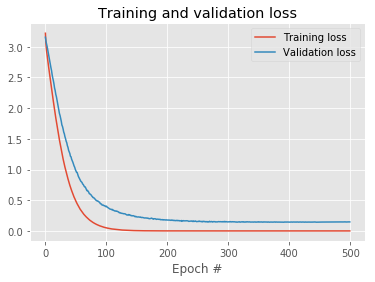

In [53]:
N = NB_EPOCHS

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="Training loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epoch #")
plt.legend(loc="upper right")
plt.savefig("Loss-CNN-based.png")

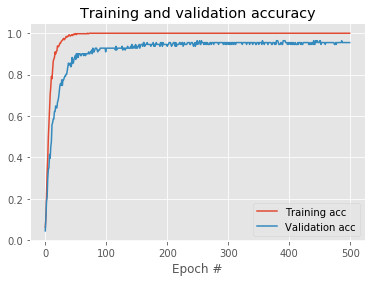

In [54]:
N = NB_EPOCHS

plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, N), history.history["acc"], label="Training acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epoch #")
plt.legend(loc="lower right")
plt.savefig("Acc-CNN-based.png")